In [4]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [5]:
def to_percentage(proportion):
    return proportion*100

twenty_percent = to_percentage(0.2)
twenty_percent

20.0

In [6]:
a_proportion = 2**(0.5) / 2
a_percentage = to_percentage(a_proportion)
a_percentage


70.71067811865476

In [7]:
def num_non_vowels(a_string):
    vowels = make_array('a', 'e', 'i', 'o', 'u')
    count = 0
    for letter in a_string:
        if letter not in vowels:
            count = count + 1
    return count


In [8]:
import pandas as pd
from datascience import Table

movies_by_year = Table.read_table("movies_by_year.csv")
def print_kth_top_movie_year(k):
    sorted_movies = movies_by_year.sort("Total Gross", descending=True)
    if k > sorted_movies.num_rows:
        print(f"Không có đủ dữ liệu để tìm năm đứng thứ {k} về doanh thu.")
        return

    year_k = sorted_movies.column("Year").item(k - 1)
    print(f"Năm đứng thứ {k} về tổng doanh thu phim là: {year_k}")

rank = 5
fifth_from_top_movie_year = movies_by_year.sort("Total Gross", descending=True).column("Year").item(rank-1)
print("Year number", rank, "for total gross movie sales was:", fifth_from_top_movie_year)


Year number 5 for total gross movie sales was: 2010


In [9]:

raw_compensation = Table.read_table('raw_compensation.csv')
raw_compensation

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256


In [10]:
total_pay_type = type(raw_compensation.column("Total Pay").item(0))
total_pay_type


str

In [11]:
mark_hurd_pay_string = raw_compensation.column("Total Pay").item(0)
mark_hurd_pay_string


'$53.25 '

In [12]:
mark_hurd_pay = float(mark_hurd_pay_string.strip("$")) * 1_000_000
mark_hurd_pay


53250000.0

In [13]:
def convert_pay_string_to_number(pay_string):
    return float(pay_string.strip("$")) * 1_000_000


In [14]:
# This cell resets max to the built-in function. Just run this cell, don't change its contents
import builtins
max = builtins.max

In [15]:
from datascience import make_array

some_functions = make_array(abs, len, sum)


In [16]:
compensation = raw_compensation.with_column(
    "Total Pay ($)",
    raw_compensation.apply(convert_pay_string_to_number, "Total Pay")
)

compensation


Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($)
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362,5.325e+07
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362,5.324e+07
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477,4.491e+07
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342,3.598e+07
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338,3.336e+07
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222,2.484e+07
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183,2.204e+07
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182,1.986e+07
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170,1.962e+07
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256,1.932e+07


In [17]:
average_total_pay = compensation.column("Total Pay ($)").mean()
average_total_pay


11558613.861386139

In [18]:
cash_pay_numeric = compensation.apply(convert_pay_string_to_number, "Cash Pay")
total_pay_numeric = compensation.apply(convert_pay_string_to_number, "Total Pay")

cash_proportion = cash_pay_numeric / total_pay_numeric
cash_proportion


array([ 0.01784038,  0.01784373,  0.55421955,  0.02779322,  0.13938849,
        0.48711755,  0.19555354,  0.12437059,  0.25993884,  0.35196687,
        0.3075693 ,  0.22138635,  0.13126362,  0.1708126 ,  0.23099415,
        0.06734817,  0.13043478,  0.28004957,  0.33229814,  0.15355805,
        0.29337748,  0.21829105,  0.31100478,  0.25086147,  0.2299169 ,
        0.16991643,  0.31795947,  0.26188786,  0.28357143,  0.15654718,
        0.38168558,  0.28934426,  0.20361248,  0.47650453,  0.45643154,
        0.36402027,  0.2177626 ,  0.24763543,  0.42562724,  0.2610261 ,
        0.18361836,  0.1444548 ,  0.33333333,  0.10834132,  0.20925747,
        0.97276265,  0.22979552,  0.22789784,  0.37893701,  0.25175527,
        0.73895582,  0.37018256,  0.2412731 ,  0.2133758 ,  0.20553781,
        0.23318872,  0.33664459,  0.3875969 ,  0.56094808,  0.11757991,
        0.35239207,  0.24463007,  0.25      ,  0.23712575,  0.43377886,
        0.31424936,  0.46363636,  0.32585752,  0.24766977,  0.98

In [19]:
def percent_string_to_num(percent_string):
    return float(percent_string.strip('%')) / 100

having_previous_year = compensation.where("% Change", are.not_containing("No previous year"))
percent_changes = having_previous_year.apply(percent_string_to_num, "% Change")
previous_pay = having_previous_year.column("Total Pay ($)") / (1 + percent_changes)

with_previous_compensation = having_previous_year.with_column("2014 Total Pay ($)", previous_pay)
with_previous_compensation


Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($),2014 Total Pay ($)
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477,4.491e+07,4.6299e+07
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342,3.598e+07,4.23294e+07
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338,3.336e+07,3.97143e+07
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222,2.484e+07,2.5875e+07
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183,2.204e+07,2.59294e+07
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182,1.986e+07,1.56378e+07
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170,1.962e+07,1.64874e+07
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256,1.932e+07,2.14667e+07
11,John C. Martin**,Gilead Sciences (Foster City),$18.76,-1%,$5.77,$12.98,$0.01,117,1.876e+07,1.89495e+07
13,Shantanu Narayen,Adobe Systems (San Jose),$18.36,3%,$2.41,$15.85,$0.09,125,1.836e+07,1.78252e+07


In [20]:
average_pay_2014 = with_previous_compensation.column("2014 Total Pay ($)").mean()
average_pay_2014


11794790.817048479

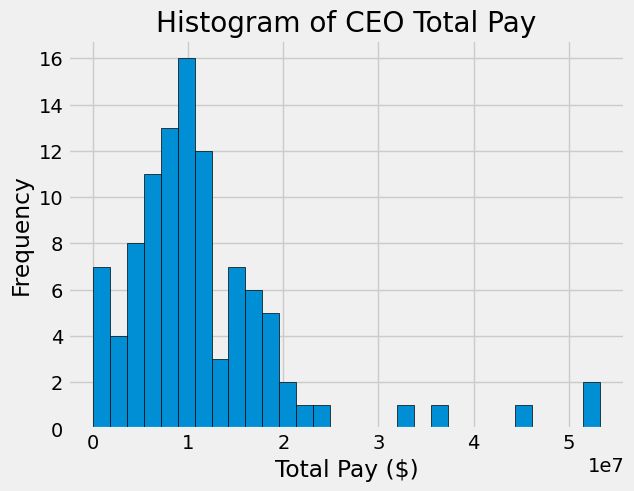

In [21]:
import matplotlib.pyplot as plt

total_pay = compensation.column("Total Pay ($)")

plt.hist(total_pay, bins=30, edgecolor='black')

plt.title("Histogram of CEO Total Pay")
plt.xlabel("Total Pay ($)")
plt.ylabel("Frequency")

plt.show()


In [22]:
num_ceos_more_than_30_million_2 = np.count_nonzero(compensation.column("Total Pay ($)") > 30000000)

num_ceos_more_than_30_million_2


5

In [23]:
submitted = True